# Diabetes 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('Diabetes.csv')
df.head()

,Unnamed: 0,Kehamilan,Glukosa,Tekanan Darah,Ketebalan Kulit,Insulin,BMI,DiabetesPedigreeFunction,Umur,Hasil
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1


#### Isi dataset : 
1. Kehamilan (jumlah)
2. Glukosa (mg/dl)
3. Tekanan darah (mmHg)
4. Ketebalan kulit (mm)
5. Insulin (uU/ml)
6. BMI (kg/m^2)
7. Diabetes Pedigree Function (0-1)
8. Umur (tahun)
9. Hasil (0 : tidak diabetes dan 1 : diabetes)

# 1. Data Understanding

In [6]:
print("Data shape : ", df.shape)

Data shape :  (768, 10)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Kehamilan                 768 non-null    int64  
 2   Glukosa                   768 non-null    int64  
 3   Tekanan Darah             768 non-null    int64  
 4   Ketebalan Kulit           768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Umur                      768 non-null    int64  
 9   Hasil                     768 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 60.1 KB


In [8]:
df[['Kehamilan', 'Tekanan Darah', 'Umur', 'BMI']].describe()

,Kehamilan,Tekanan Darah,Umur,BMI
count,768.000000,768.000000,768.000000,768.000000
mean,3.845052,69.105469,33.240885,31.992578
std,3.369578,19.355807,11.760232,7.884160
min,0.000000,0.000000,21.000000,0.000000
25%,1.000000,62.000000,24.000000,27.300000
50%,3.000000,72.000000,29.000000,32.000000
75%,6.000000,80.000000,41.000000,36.600000
max,17.000000,122.000000,81.000000,67.100000


In [9]:
df.Hasil.value_counts()

Hasil
0    500
1    268
Name: count, dtype: int64

Dapat dilihat bahwa data bertipe numerik semua. Selanjutnya, akan dilakukan pembersihan data jika terdapat data kosong sebelum dibentuk model klasifikasi.

#

# 2. Cleaning Data

In [13]:
df.isnull().sum()

Unnamed: 0                  0
Kehamilan                   0
Glukosa                     0
Tekanan Darah               0
Ketebalan Kulit             0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Umur                        0
Hasil                       0
dtype: int64

In [14]:
df.drop('Unnamed: 0', axis=1, inplace=True)  # Untuk membuang kolom 'Unnamed: 0'
df.head()

,Kehamilan,Glukosa,Tekanan Darah,Ketebalan Kulit,Insulin,BMI,DiabetesPedigreeFunction,Umur,Hasil
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
df.duplicated().sum()

0

Dapat dilihat bahwa tidak terdapat data kosong

#

# 3. Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) adalah proses penting dalam analisis data yang bertujuan untuk memahami karakteristik dan struktur dataset sebelum melakukan analisis lebih lanjut. 
Berikut adalah beberapa kegunaan utama EDA:
1. Identifikasi Pola dan Anomali: EDA membantu dalam menemukan pola dalam data serta mendeteksi anomali atau nilai ekstrem yang dapat mempengaruhi hasil analisis.
2. Pengujian Hipotesis: Proses ini memungkinkan analis untuk menguji hipotesis awal dan memeriksa asumsi yang mungkin ada tentang data.
3. Pembersihan Data: EDA memungkinkan identifikasi masalah dalam data, seperti nilai yang hilang, duplikasi, dan inkonsistensi, sehingga dapat dilakukan pembersihan data yang diperlukan sebelum analisis lebih lanjut.
4. Memahami Hubungan Antar Variabel: Dengan menggunakan teknik seperti analisis univariat dan multivariat, EDA membantu dalam menggali hubungan antara variabel-variabel dalam dataset.
5. Persiapan untuk Analisis Lanjutan: EDA memberikan gambaran umum yang diperlukan untuk memilih teknik statistik atau algoritma machine learning yang paling sesuai untuk analisis lebih lanjut.
6. Visualisasi Data: EDA sering melibatkan visualisasi data, yang merupakan cara efektif untuk mengkomunikasikan temuan kepada pemangku kepentingan non-teknis dan membantu dalam pengambilan keputusan berbasis data.

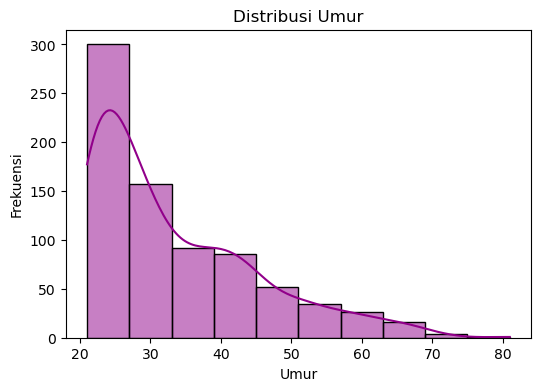

In [20]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Umur', bins=10, kde=True, color='#91008a')

plt.title('Distribusi Umur')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

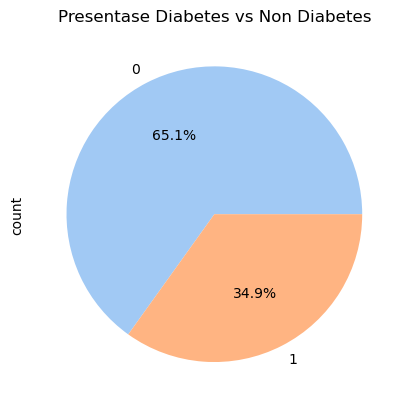

In [21]:
sns.set_palette('pastel')
df['Hasil'].value_counts().plot(kind='pie', autopct="%1.1f%%")
plt.title("Presentase Diabetes vs Non Diabetes")
plt.show()

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_8264\2383855657.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Hasil', y='Umur', palette='rocket')


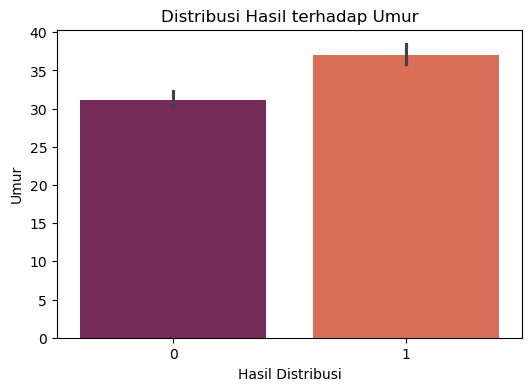

In [22]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Hasil', y='Umur', palette='rocket')

plt.title('Distribusi Hasil terhadap Umur')
plt.xlabel('Hasil Distribusi')
plt.ylabel('Umur')
plt.show()


Dari histogram tersebut dapat dilihat bahwa orang yang umurnya lebih tinggi memiliki presentase terkena diabetes lebih tinggi dari yang umurnya lebih rendah.

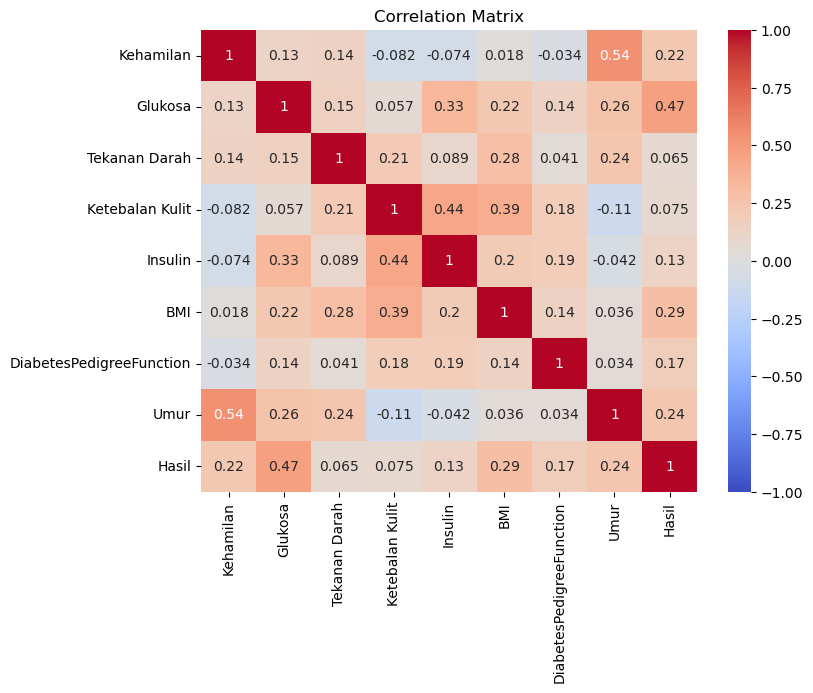

In [24]:

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlation Matrix')
plt.show()


Dapat dilihat bahwa Insulin mempengaruhi ketebelan kulit sebesar 44%. Lalu, dilihat juga bahwa BMI juga mempengaruhi tingkat ketebalan kulit sebesar 39%. Selain itu, kehamilan seseorang juga dilihat bahwa dipengaruhi oleh umur sebesar 54%

# 4.Preparation Data

In [27]:
X = df.drop(columns=['Hasil'])
y = df['Hasil']

print("X :" , X.shape)
print("Y :" , y.shape)

X : (768, 8)
Y : (768,)


In [28]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#

# 5. Modelling

Tahap pemodelan dalam proses analisis data mencakup beberapa aspek penting yang bertujuan untuk membangun dan mengevaluasi model yang efektif. Berikut adalah aspek-aspek utama yang dilakukan pada tahap pemodelan:1. Pembuatan Fitur: Mengubah data mentah menjadi fitur yang relevan untuk model. Ini meliputi agregasi, transformasi, dan pemilihan variabel yang informatif.
2. Pembersihan Data: Mengatasi masalah seperti nilai hilang dan outlier, serta memastikan data dalam format yang sesuai untuk pemodelan.
3. Pembagian Data: Memisahkan dataset menjadi data pelatihan dan pengujian untuk menghindari overfitting dan memastikan model dapat generalisasi dengan baik.
4. Pemilihan Algoritma: Menggunakan berbagai algoritma pembelajaran mesin untuk menemukan model yang paling akurat.
5. Penyetelan Parameter: Mengoptimalkan parameter model untuk meningkatkan kinerja, sering kali melalui teknik seperti grid search atau random search.
arch1.

Disini akan digunakan model SVM. SVM adalah model pembelajaran terawasi yang berfungsi untuk menemukan hyperplane optimal yang memisahkan data ke dalam kelas yang berbeda di ruang berdimensi tinggi. Tujuan utama SVM adalah untuk memaksimalkan margin antara data dari dua kelas, sehingga menciptakan batas keputusan yang paling efektif.

In [34]:
clf = SVC(kernel = 'linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
CLF_acc = accuracy_score(y_pred,y_test)

print(classification_report(y_test, y_pred))
print("Akurasi SVM : {:.2f}%". format(CLF_acc*100))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154

Akurasi SVM : 75.97%


### Cara Kerja SVM
1. Hyperplane: Dalam konteks dua dimensi, hyperplane adalah garis yang membagi ruang menjadi dua bagian. Dalam dimensi lebih tinggi, hyperplane menjadi permukaan yang memisahkan kelas.
2. Support Vectors: Titik data yang berada paling dekat dengan hyperplane disebut support vectors. Hanya titik-titik ini yang berkontribusi pada pembentukan hyperplane, sehingga SVM sangat efisien dalam hal memori.
3. Kernel Trick: SVM dapat menangani masalah klasifikasi non-linear dengan menggunakan fungsi kernel, yang memungkinkan data untuk dipetakan ke ruang fitur berdimensi lebih tinggi tanpa perlu melakukan transformasi eksplisit. Ini membuat pemisahan kelas menjadi lebih mudah.

### Disini dalam dilihat bahwa akurasinya sebesar 75.35%

#

# 6. Testing

In [39]:
new_data = {
    'Kehamilan' : [6],
    'Glukosa' : [150],
    'Tekanan Darah' : [66],
    'Ketebalan Kulit' : [35],
    'Insulin' : [0],
    'BMI' : [30.6],
    'DiabetesPedigreeFunction' : [0.651],
    'Umur' : [31],
}

new_data = pd.DataFrame(new_data)
new_data #| = new_data.drop(columns=['Unnamed: 0'])

,Kehamilan,Glukosa,Tekanan Darah,Ketebalan Kulit,Insulin,BMI,DiabetesPedigreeFunction,Umur
0,6,150,66,35,0,30.6,0.651,31


In [40]:
scaled_new_data = scaler.transform(new_data)
y_pred_new = clf.predict(scaled_new_data)

print('Diagnosis Data Baru : ', y_pred_new)

Diagnosis Data Baru :  [1]
